In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

2025-04-26 11:48:18.003086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-04-26 11:48:18.003168: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-04-26 11:48:18.177372: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-26 11:48:20.997923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-04-26 11:48:20.998315: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#one hot encoding - переводит вектор результатов в набор векторов
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
y_train_cat[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [2]:
# Load data from csv file from dermatology_database_1.csv
file_path = os.path.join('dermatology_database_1.csv')

# Load the data
df = pd.read_csv(file_path)





In [3]:
df['age'] = df['age'].replace('?', np.nan)  # Replace '?' with NaN

# we remove rows with NaN values in the 'age' column using dropna() function
df.dropna(subset=['age'], inplace=True)

df['age'] = df['age'].astype(float).astype(pd.Int64Dtype())  # Convert to float and then to integer

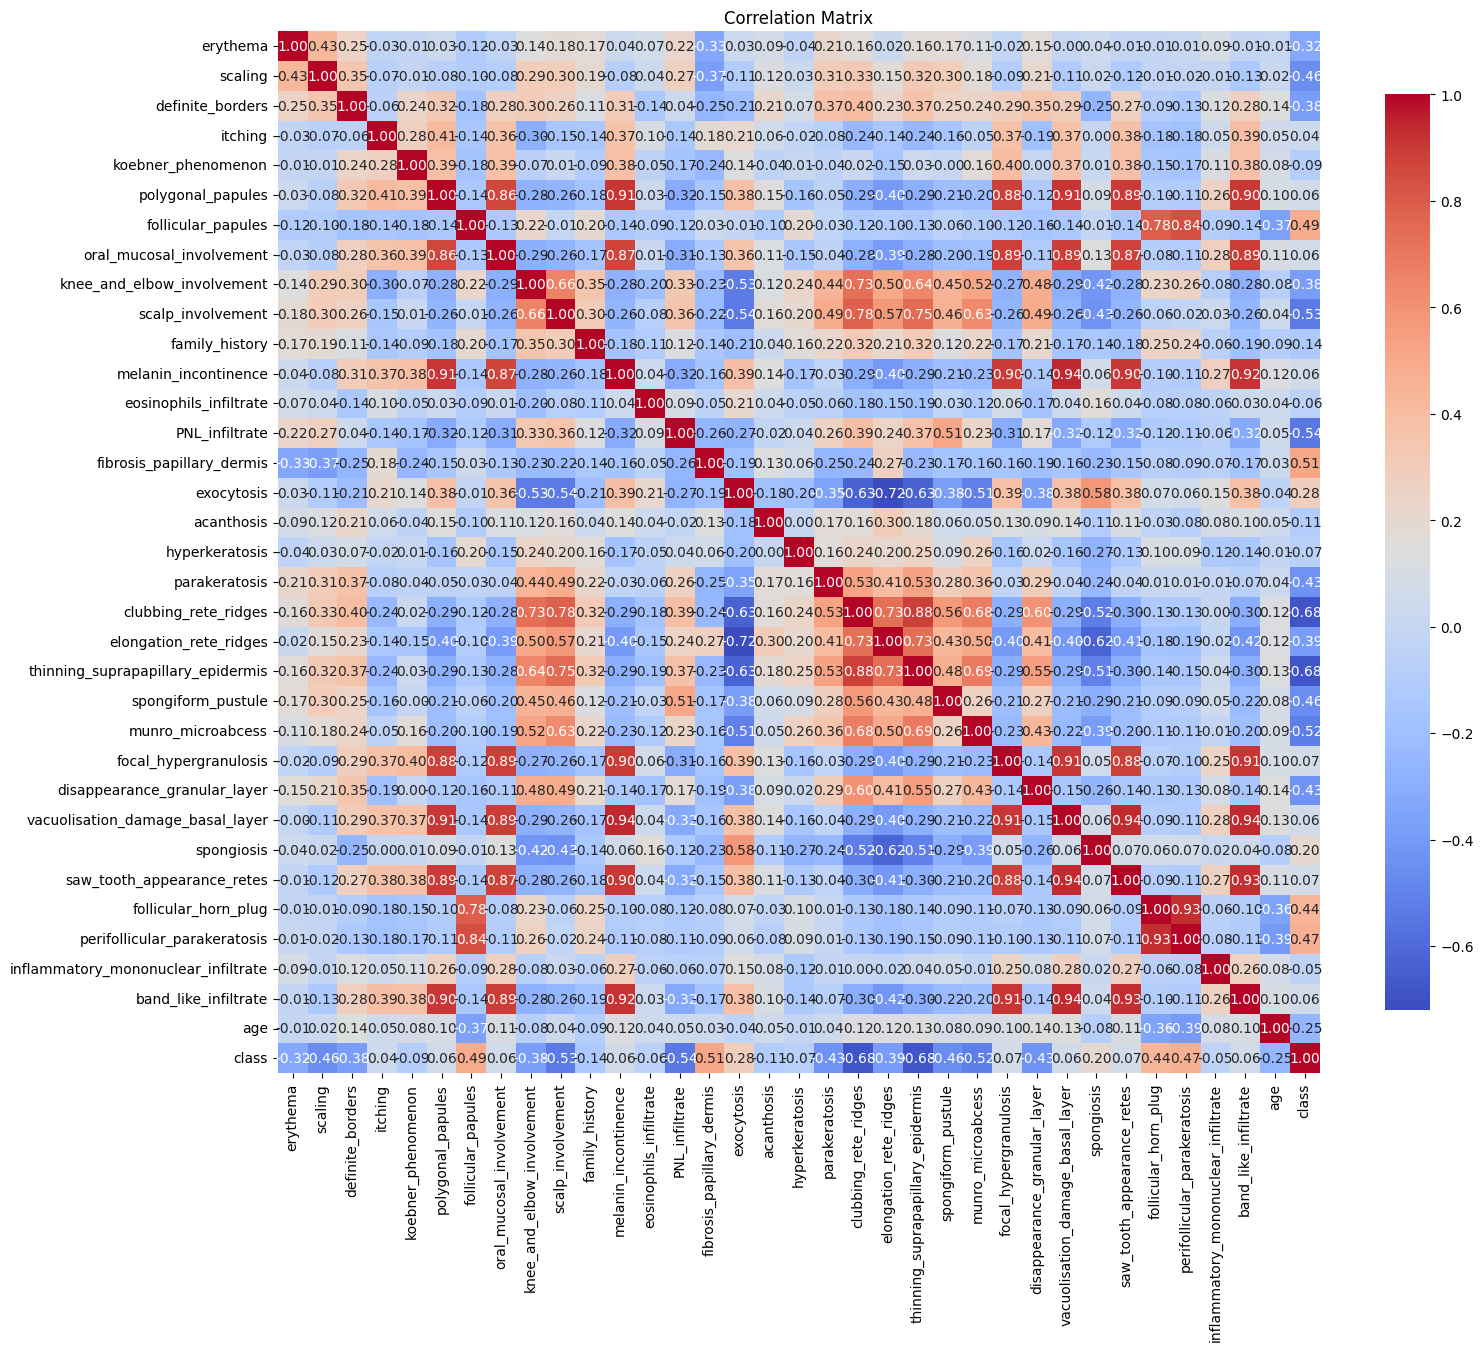

In [4]:
# Calculate the correlation matrix
# corr_matrix = df.corr()
corr_matrix = df.corr(method='pearson')
# Display the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# corr_matrix

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.003s...
[t-SNE] Computed neighbors for 358 samples in 0.468s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 3.587629
[t-SNE] Computed conditional probabilities in 0.076s
[t-SNE] Iteration 50: error = 51.8545761, gradient norm = 0.0406368 (50 iterations in 0.145s)
[t-SNE] Iteration 100: error = 50.9178505, gradient norm = 0.0086950 (50 iterations in 0.320s)
[t-SNE] Iteration 150: error = 50.8928490, gradient norm = 0.0062967 (50 iterations in 0.118s)
[t-SNE] Iteration 200: error = 50.8954391, gradient norm = 0.0113404 (50 iterations in 0.155s)
[t-SNE] Iteration 250: error = 50.8930511, gradient norm = 0.0165392 (50 iterations in 0.116s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.893051
[t-SNE] Iteration 300: error = 0.3541053, gradient norm = 0.0061219 (50 iterations in 0.119s)
[t-SNE] Iteration 350: error = 0.3230104, gradient norm = 0.0034653 (

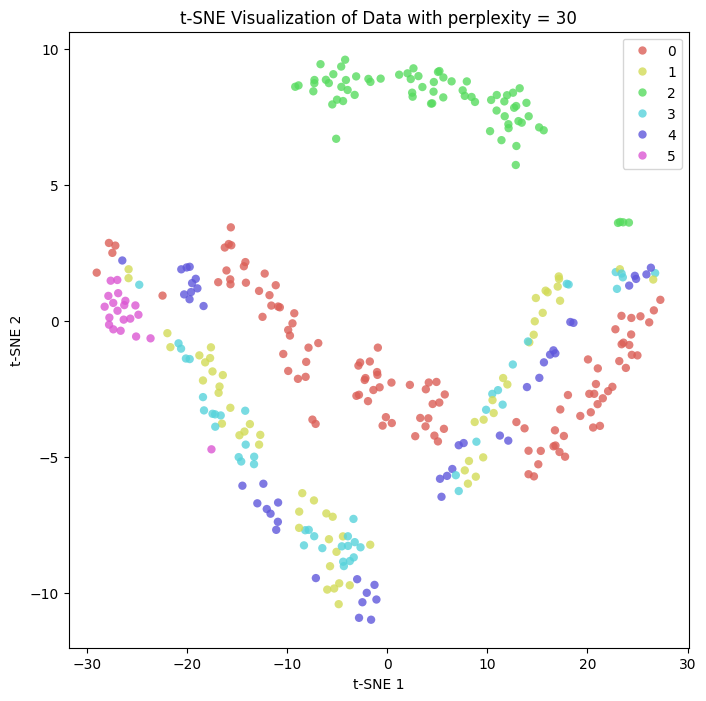

In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

le = LabelEncoder()
y = le.fit_transform(y)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=110, verbose=2)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

